<a href="https://colab.research.google.com/github/xcncxoxo/rnn-lstm-model/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 1: Redes Neuronales Recurrentes


## Introducción

Em este proyecto se busca explorar la aplicación de redes neuronales recurrentes (RNN) específicamente del modelo LSTM, para predecir el precio de cierre del Bitcoin.
Se utilizó el dataset [Bitcoin Historical Data](https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data), con información diaria sobre precios y volumen de transacciones.

### Objetivo
Poner en ptráctica los conceptos revisados en clase, comprendiendo el funcionamiento de la RNN y la importancia de su estructura y utilidad al trabajar con series temporales. A través de este proyecto se busca demostrar su utilidad en contextos reales como el análisis financiero.

#### Conjunto de datos
* Nombre: [Bitcoin Historical Data](https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data)
* Fuente: Kaggle
* Columnas importantes: *datetime*, *close*
* Total de registros: 6983813

### Sobre el modelo
#### Preprocesamiento
Se realizó la conversión de la columna *datetime* al formato adecuado. Se normalizaron los datos con **MinMaxScaler**. Se generaron secuencias de 30 días.

#### Modelo
* Arquitectura: 2 capas LSTM y una capa Dense
* Optimización: Adam
* Pérdida: MSE
* Épocas: 10
* Batch: 64

#### Justificación
La ventaja de ete modelo es su capacidad para trabajar con secuencias temporales; el precio del bitcoin está altamente influenciado por su comportamiento en días anteriores.

La primera capa LSTM captura los patrones locales (de un día al siguiente) y la segunda capa LSTM entiende los patrones más a largo plazo (semanas). La capa Dense convierte la salida de la segunda capa LSTM al valor que se quiere predecir.

Se implementó el optimizador **Adam** por su notoriedad y eficiencia para el entrenamiento de redes profundas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('/content/btcusd_1-min_data.csv')

In [3]:
print(df.shape) # pa saber cuántpos datos tenemos

(1592095, 7)


In [4]:
print(df.columns)

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'datetime'], dtype='object')


In [5]:
# checar que la columna de fecha está en formato de fecha
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

In [6]:
df = df[['Close']]  # nos interesa el precio de cierre

In [7]:
print(df.shape) # pa saber cuántpos datos tenemos

(1592095, 1)


In [8]:
sample_fraction = 0.75
df = df.sample(frac=sample_fraction, random_state=42).sort_index()
# el data set es enorme, así que solo usamos una fracción considerable 75 %

In [9]:
print(df.shape) # pa saber cuántpos datos tenemos

(1194071, 1)


In [10]:
# normalizamos...
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

In [16]:
# secuencias
sequence_length = 30
# recordar que tenemos casi 7 millones de datos
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

In [17]:
# dividimos conjuntos de train y test
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [18]:
# modelo
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [19]:
model.compile(optimizer=Adam(), loss='mean_squared_error')

In [20]:
# entrenamos
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
14926/14926 ━━━━━━━━━━━━━━━━━━━━ 606s 40ms/step - loss: 1.7334e-04 - val_loss: nan
Epoch 2/10
14926/14926 ━━━━━━━━━━━━━━━━━━━━ 620s 40ms/step - loss: 3.0710e-06 - val_loss: nan
Epoch 3/10
14926/14926 ━━━━━━━━━━━━━━━━━━━━ 661s 43ms/step - loss: 2.3539e-06 - val_loss: nan
Epoch 4/10
14926/14926 ━━━━━━━━━━━━━━━━━━━━ 649s 40ms/step - loss: 2.0109e-06 - val_loss: nan
Epoch 5/10
14926/14926 ━━━━━━━━━━━━━━━━━━━━ 621s 40ms/step - loss: 1.9170e-06 - val_loss: nan
Epoch 6/10
14926/14926 ━━━━━━━━━━━━━━━━━━━━ 636s 43ms/step - loss: 1.7528e-06 - val_loss: nan
Epoch 7/10
14926/14926 ━━━━━━━━━━━━━━━━━━━━ 684s 43ms/step - loss: 1.6928e-06 - val_loss: nan
Epoch 8/10
14926/14926 ━━━━━━━━━━━━━━━━━━━━ 645s 43ms/step - loss: 1.6815e-06 - val_loss: nan
Epoch 9/10
14926/14926 ━━━━━━━━━━━━━━━━━━━━ 677s 43ms/step - loss: 1.6212e-06 - val_loss: nan
Epoch 10/10
14926/14926 ━━━━━━━━━━━━━━━━━━━━ 682s 43ms/step - loss: 1.6174e-06 - val_loss: nan


In [21]:
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

7463/7463 ━━━━━━━━━━━━━━━━━━━━ 69s 9ms/step


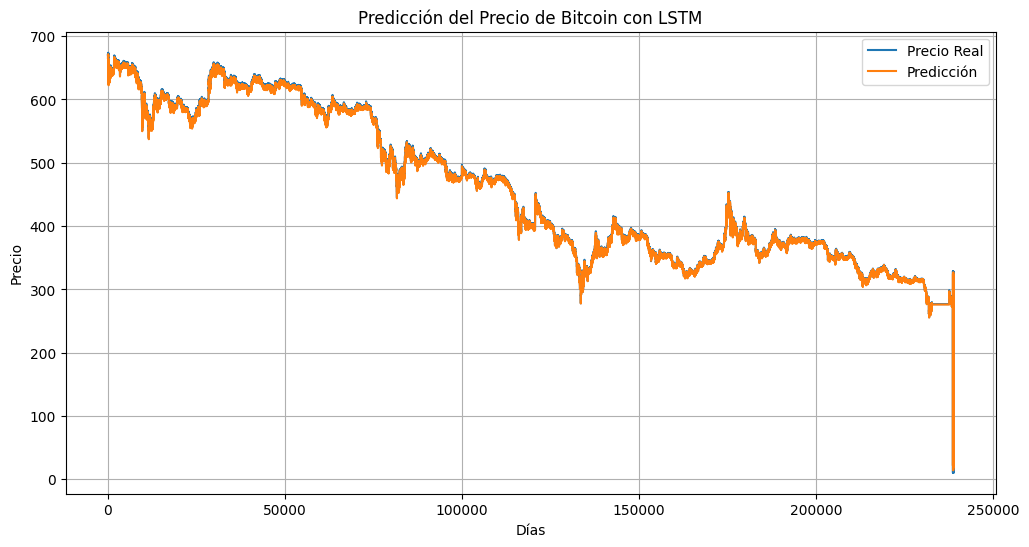

In [22]:
plt.figure(figsize=(12,6))
plt.plot(real_prices, label='Precio Real')
plt.plot(predicted_prices, label='Predicción')
plt.title('Predicción del Precio de Bitcoin con LSTM')
plt.xlabel('Días')
plt.ylabel('Precio')
plt.legend()
plt.grid()
plt.show()

### Conclusión
Como se observa en la gráfica comparativa *precios reales vs. predicción*, el modelo implementado logró capturar la tendencia general del precio del Bitcoin, demostrando su capacidad para procesar datos temporales y generar predicciones.

### Fuentes

* Kaggle
* Documentación de Keras y TensorFlow
* Material de clase